In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [268]:
prices = pd.read_csv(r'C:\Users\Acabes\Documents\Pilot\prices.csv',index_col='date',parse_dates=True)

In [269]:
prices.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-05-01,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
2016-06-01,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2016-07-01,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
2016-08-01,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
2016-11-01,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


In [270]:
prices.shape

(851264, 6)

In [271]:
features_with_na = [features for features in prices.columns if prices[features].isnull().sum()>1]
#Checking for features with null values

In [272]:
print(features_with_na)
#No Null Values in dataset

[]


In [273]:
#Checking total unique stocks listed in the data set
prices.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [274]:
prices.symbol.nunique()
# This dataset is analyzing 501 unique stocks

501

In [275]:
# Since the data set contains stocks from multiple companies, we will do our details analysis on selected companies

Text(0, 0.5, 'Volume')

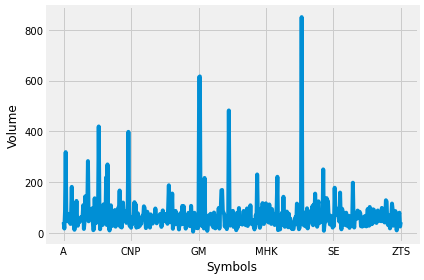

In [276]:
prices.groupby('symbol')['close'].median().plot()
# finding the sale price median of each group of years
plt.xlabel('Symbols')
plt.ylabel('Volume')

In [277]:
numerical_features = [feature for feature in prices.columns if prices[feature].dtypes != 'O']
print("Number of numerical variables: ",len(numerical_features))

Number of numerical variables:  5


In [278]:
prices.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-05-01,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
2016-06-01,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2016-07-01,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
2016-08-01,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
2016-11-01,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


In [279]:
prices["symbol"].value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [280]:
#Checking paypal stock
paypal = prices[prices["symbol"] == "PYPL"]

In [281]:
paypal

,symbol,open,close,low,high,volume
date,,,,,,
2015-06-07,PYPL,38.000000,36.709999,36.000000,39.750000,5866600
2015-07-07,PYPL,37.720001,36.619999,36.000000,37.810001,7359000
2015-08-07,PYPL,36.340000,34.700001,34.529999,36.360001,5387700
2015-09-07,PYPL,35.099998,34.500000,33.990002,35.520000,3760100
2015-10-07,PYPL,34.660000,34.689999,33.980000,35.189999,4472800
...,...,...,...,...,...,...
2016-12-23,PYPL,39.820000,39.580002,39.480000,39.869999,3378100
2016-12-27,PYPL,39.500000,39.720001,39.430000,40.080002,2660100
2016-12-28,PYPL,39.759998,39.570000,39.529999,40.029999,3237100


In [282]:
google = prices[prices["symbol"] == "GOOG"]

In [283]:
google

,symbol,open,close,low,high,volume
date,,,,,,
2010-04-01,GOOG,626.951088,626.751061,624.241073,629.511067,3927000
2010-05-01,GOOG,627.181073,623.991055,621.541045,627.841071,6031900
2010-06-01,GOOG,625.861078,608.261023,606.361042,625.861078,7987100
2010-07-01,GOOG,609.401025,594.101005,592.651008,610.001045,12876600
2010-08-01,GOOG,592.000997,602.021036,589.110988,603.251034,9483900
...,...,...,...,...,...,...
2016-12-23,GOOG,790.900024,789.909973,787.280029,792.739990,623400
2016-12-27,GOOG,790.679993,791.549988,787.656982,797.859985,789100
2016-12-28,GOOG,793.700012,785.049988,783.200012,794.229980,1132700


In [284]:
jpmorgan = prices[prices["symbol"] == "JPM"]

In [285]:
jpmorgan

,symbol,open,close,low,high,volume
date,,,,,,
2010-04-01,JPM,41.790001,42.849998,41.669998,42.990002,35460500
2010-05-01,JPM,42.790001,43.680000,42.779999,43.840000,41208300
2010-06-01,JPM,43.450001,43.919998,43.310001,44.090000,27729000
2010-07-01,JPM,43.790001,44.790001,43.610001,45.119999,44864700
2010-08-01,JPM,44.369999,44.680000,44.080002,44.700001,33110100
...,...,...,...,...,...,...
2016-12-23,JPM,87.000000,87.050003,86.400002,87.150002,10759400
2016-12-27,JPM,87.050003,87.129997,86.750000,87.160004,6946400
2016-12-28,JPM,87.160004,86.500000,86.349998,87.389999,9455600


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

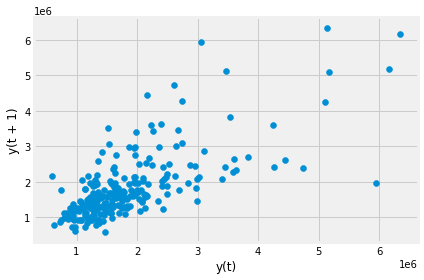

In [286]:
from pandas.plotting import lag_plot

lag_plot(google['volume'].tail(250))

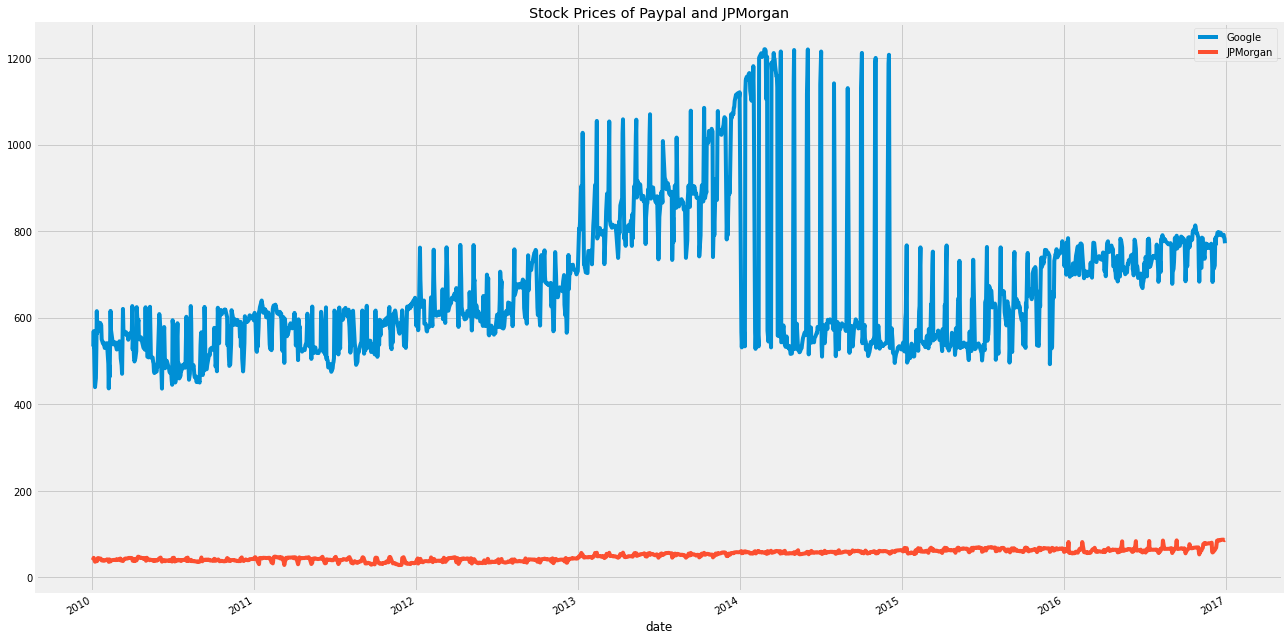

In [287]:
google['close'].plot(label = "Google", figsize = (18, 9))
jpmorgan['close'].plot(label = 'JPMorgan')

plt.title('Stock Prices of Paypal and JPMorgan')
plt.legend()

#Significant difference in trading value of JPMorgan's stock


# JP Morgan's stock seems to be more stable .Checked the finanacial results.

## 2021 - Reported Revenue - 29.3 Billion USD. Managed Revenue - 30.30 Billion USD

## 2022 - Reported Revenue - 30.7 Billion USD. Managed Revenue - 31.6 Billion USD

In [288]:
# https://www.jpmorganchase.com/content/dam/jpmc/jpmorgan-chase-and-co/investor-relations/documents/quarterly-earnings/2022/1st-quarter/c1afebcf-9ba1-44de-97fc-a446d7baf619.pdf
# https://www.jpmorganchase.com/content/dam/jpmc/jpmorgan-chase-and-co/investor-relations/documents/quarterly-earnings/2021/4th-quarter/ae462261-4964-48c6-b947-4b69963d1143.pdf

In [289]:
prices.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


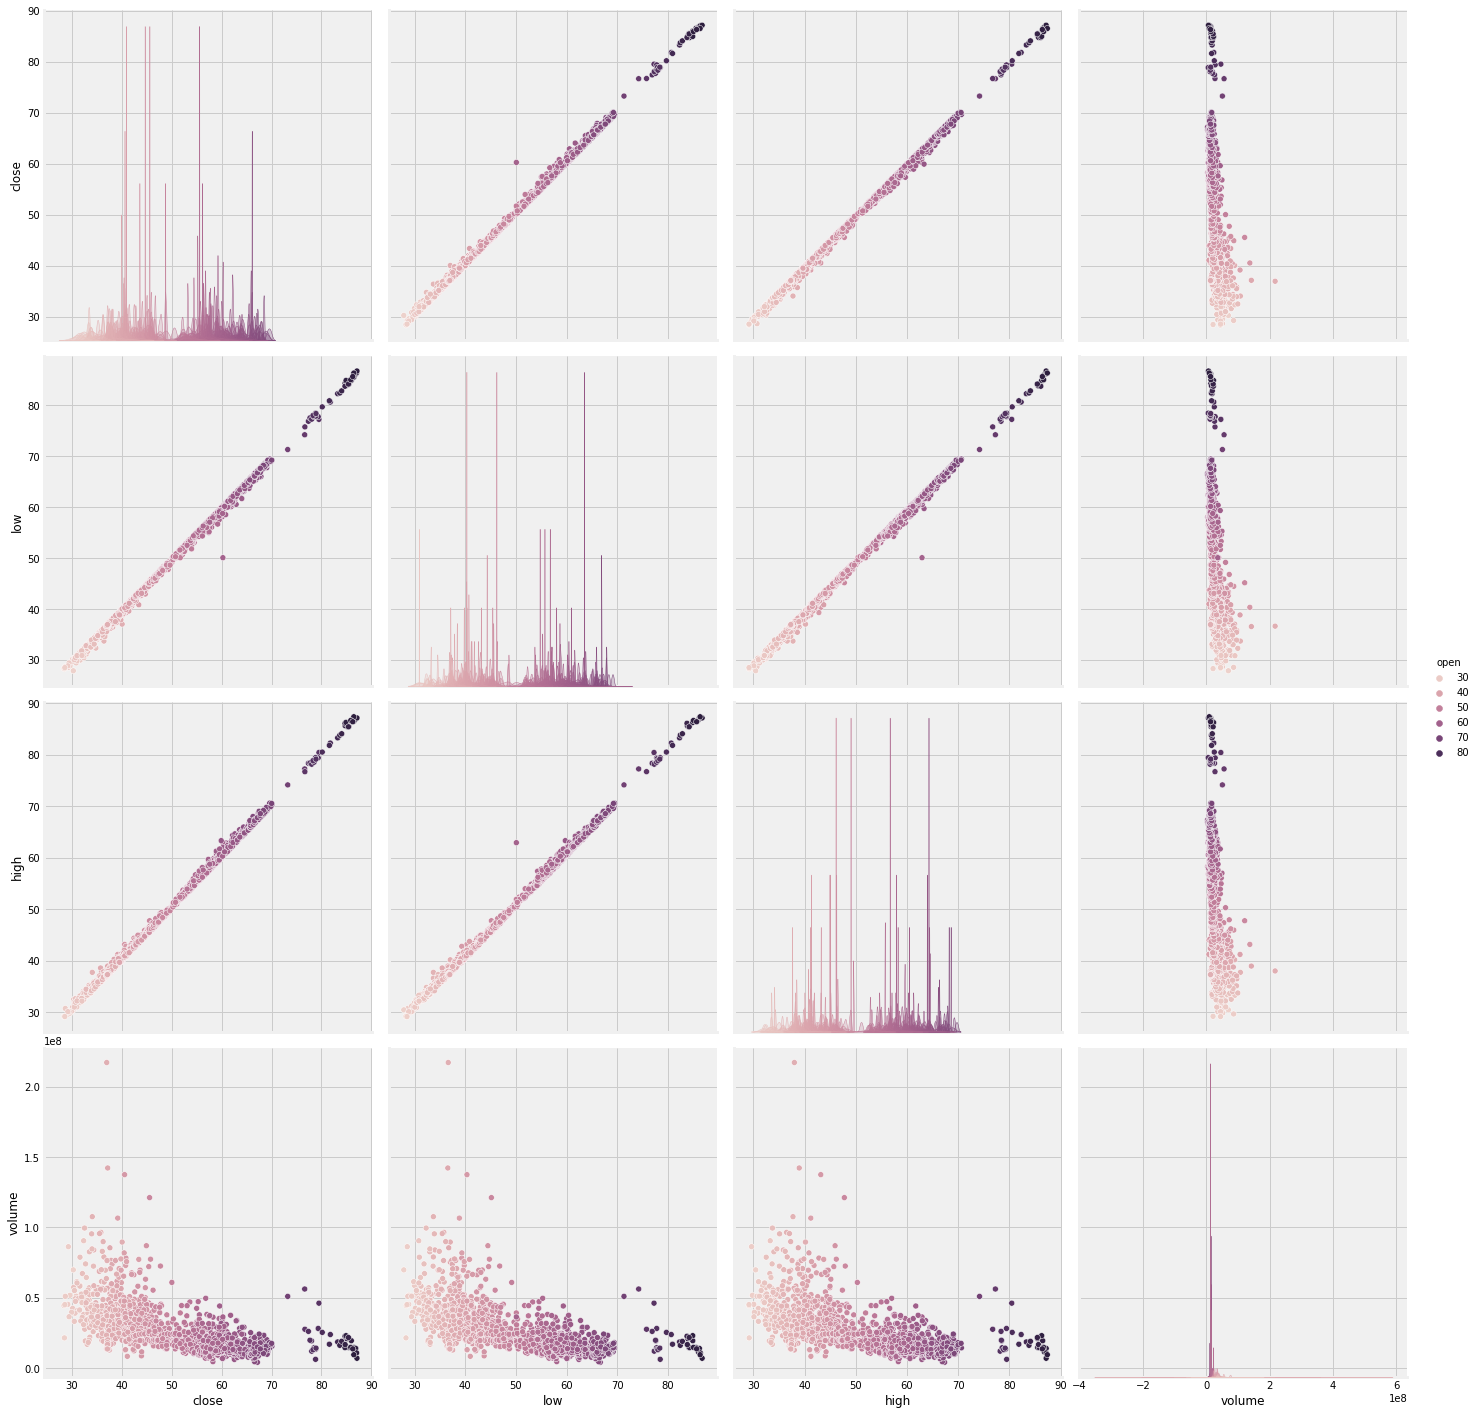

In [290]:
import seaborn as sns
sns.pairplot(data=jpmorgan, hue= 'open', height = 5)

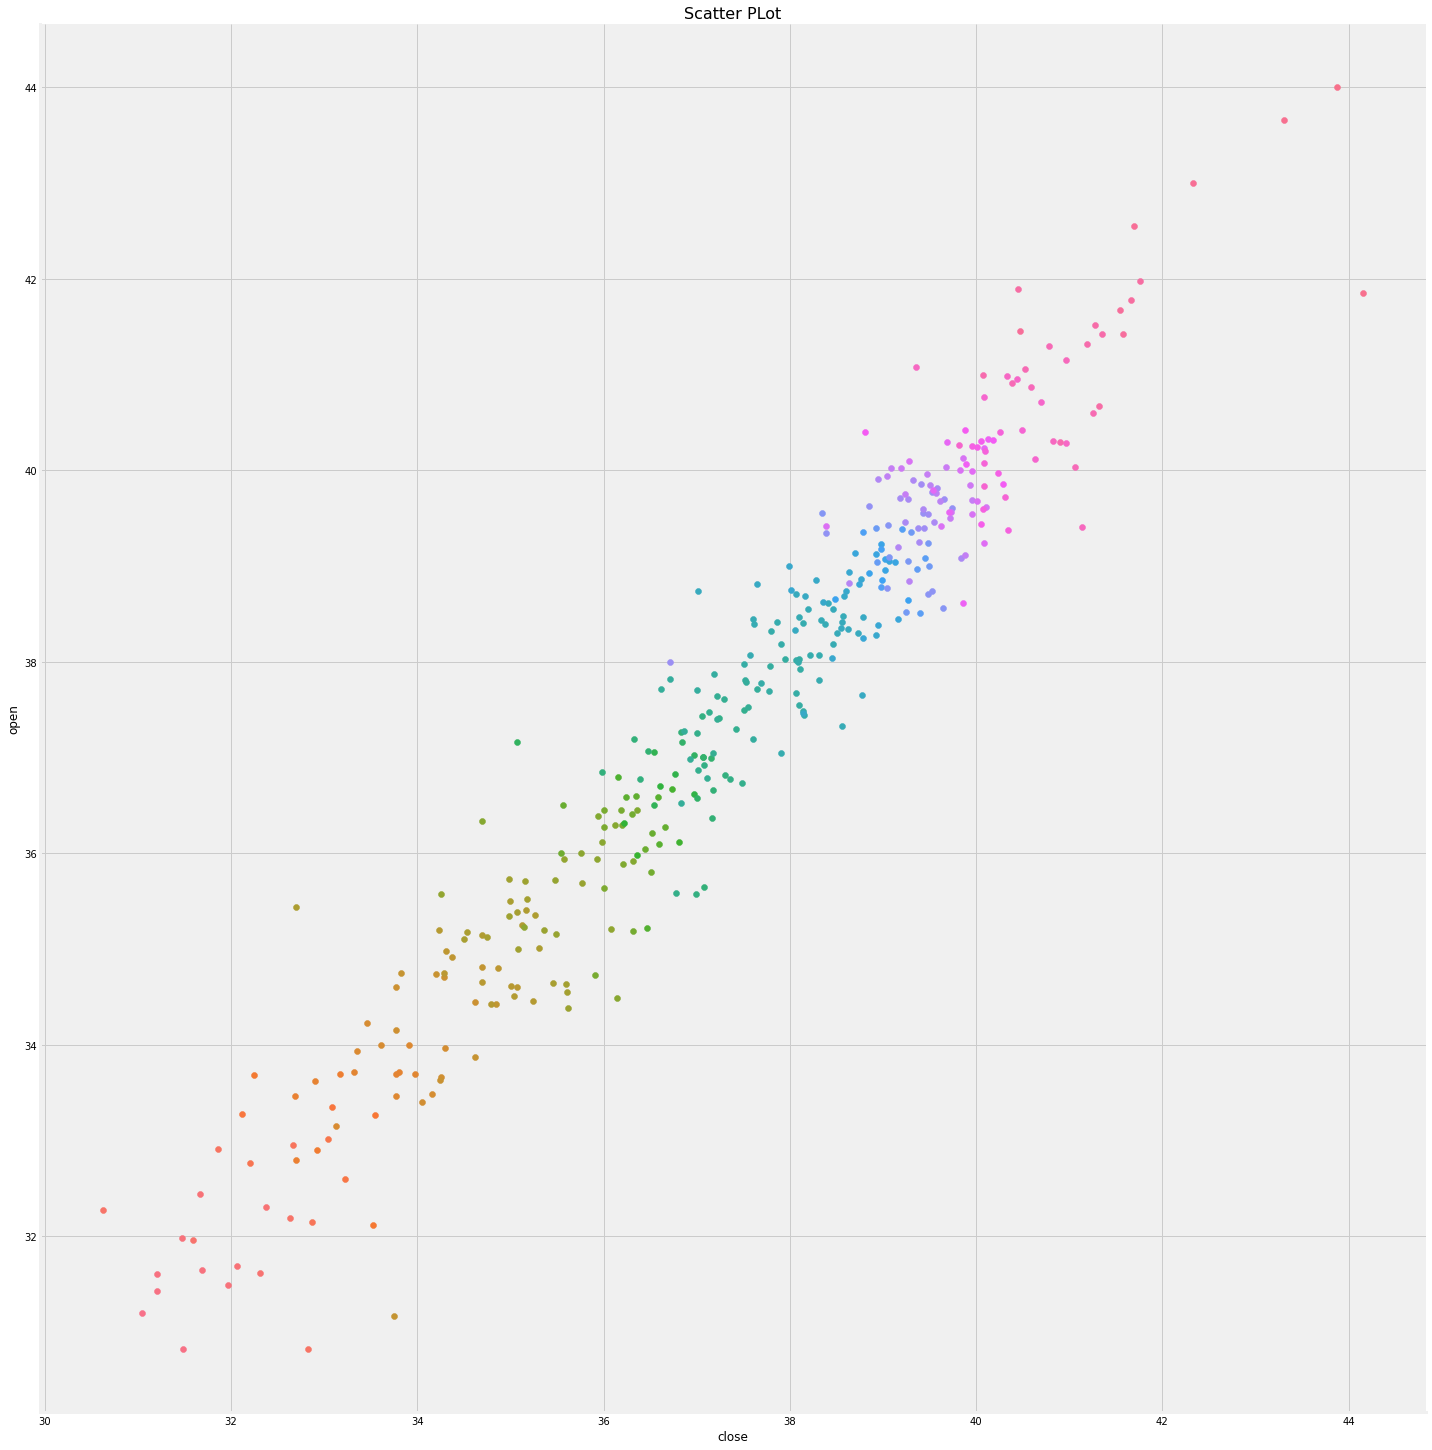

In [291]:
sns.FacetGrid(paypal, hue="high", height=20) \
   .map(plt.scatter, "close", "open")
plt.title('Scatter PLot',fontsize=16)
plt.show()

<AxesSubplot:xlabel='open', ylabel='high'>

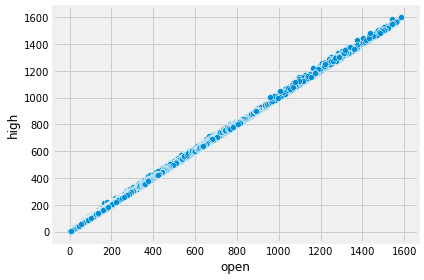

In [292]:
sns.scatterplot(data = prices, x = "open", y = "high")

<span style="color:green">As seen in the graph above, we can see a positive correlation between the opening price of a stock and the maximum value attained during that day</span>

<span style="color:blue">Although it is a given that if the price opens higher, the maximum value attained can also be higher, we have to know that stock market does not obey normal rules. It is affected by core factors such as previous day market, results and abstract values such as human emotion based on impending dangers</span>


In [293]:
prices_max_vol = prices.loc[prices['symbol'] == 'BAC']

In [294]:
prices_max_vol

,symbol,open,close,low,high,volume
date,,,,,,
2010-04-01,BAC,15.240000,15.690000,15.120000,15.750000,180845200
2010-05-01,BAC,15.740000,16.200001,15.700000,16.209999,209521300
2010-06-01,BAC,16.209999,16.389999,16.030001,16.540001,205257900
2010-07-01,BAC,16.680000,16.930000,16.510000,17.190001,320868400
2010-08-01,BAC,16.980000,16.780001,16.629999,17.100000,220104700
...,...,...,...,...,...,...
2016-12-23,BAC,22.510000,22.600000,22.430000,22.650000,38093700
2016-12-27,BAC,22.709999,22.610001,22.540001,22.740000,39891000
2016-12-28,BAC,22.620001,22.330000,22.260000,22.670000,52141300


# The maximum volume of shares traded is by Bank of America Corp
# As of today 7/7/2022, their volume of stocks is 49.54 M
### https://www.google.com/finance/quote/BAC:NYSE?sa=X&ved=2ahUKEwjNxsbm9-X4AhWam9gFHY89BdYQ3ecFegQIJRAi

In [295]:
# Checking the index of the dataset

In [296]:
prices.index

DatetimeIndex(['2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-11-01', '2016-12-01', '2016-01-13', '2016-01-14',
               '2016-01-15', '2016-01-19',
               ...
               '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30',
               '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30',
               '2016-12-30', '2016-12-30'],
              dtype='datetime64[ns]', name='date', length=851264, freq=None)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

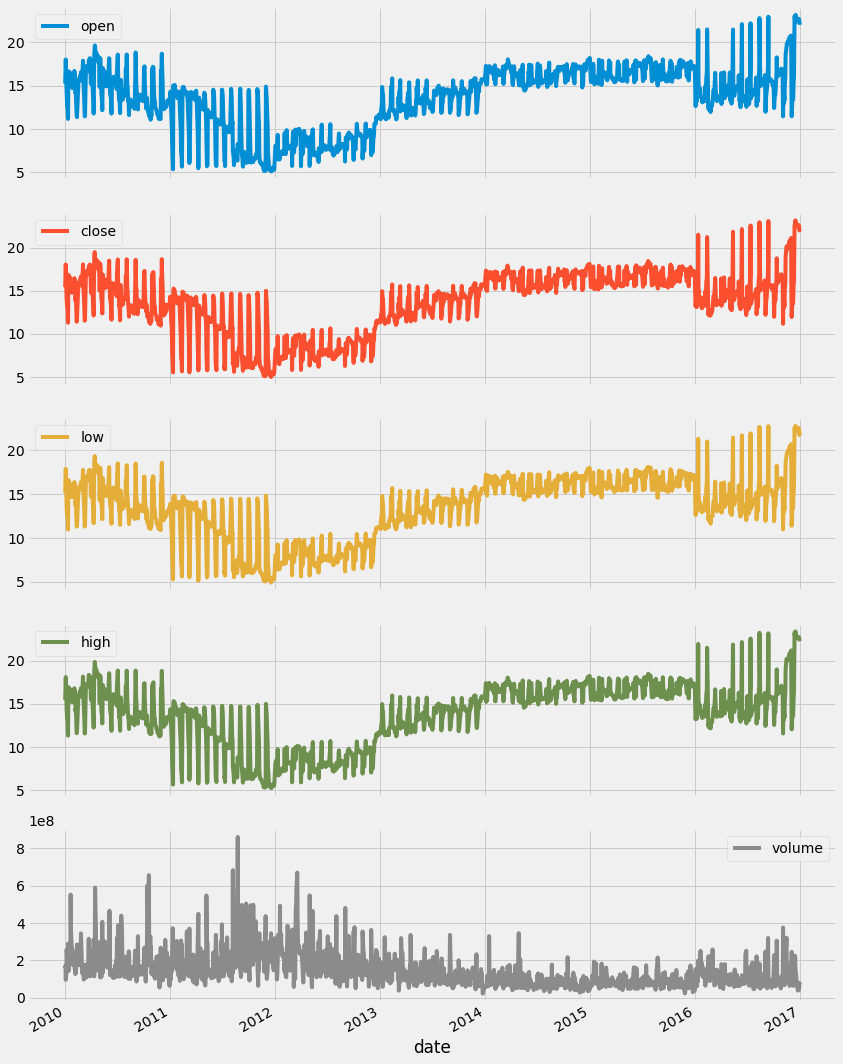

In [297]:
plt.style.use("fivethirtyeight")
prices_max_vol.plot(subplots=True, figsize=(12, 15))

# Checking if there is any null values

In [298]:
features_with_na = [features for features in prices.columns if prices[features].isnull().sum()>1]
#Checking for features with null values

In [299]:
print(features_with_na)
#No Null Values in dataset

[]


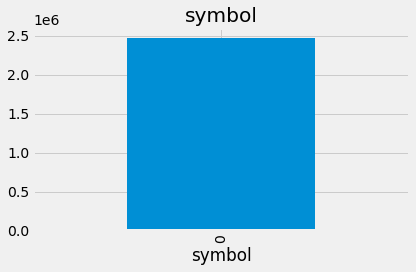

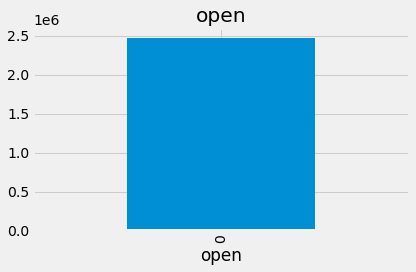

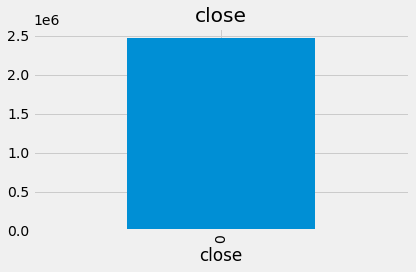

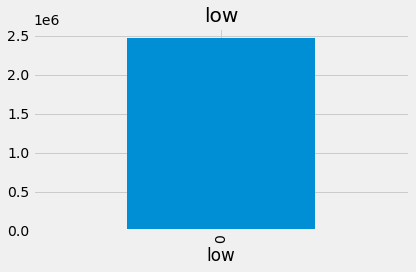

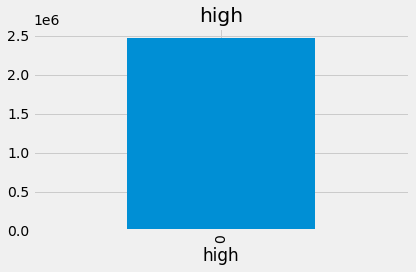

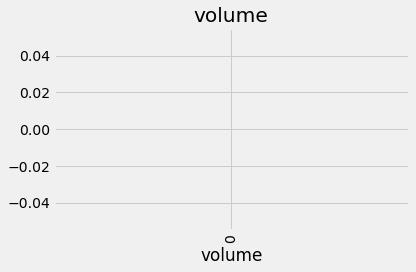

In [300]:
for feature in prices.columns:
    prices_copy=prices.copy()
    #1-Observations missing | 0-Observations not missing
    prices_copy[feature] = np.where(prices_copy[feature].isnull(),1,0)
    
    prices_copy.groupby(feature)['volume'].median().plot.bar()
    plt.title(feature)
    plt.show()
    
 # No Observations missing here   

# Checking data types

In [301]:
prices.dtypes

symbol     object
open      float64
close     float64
low       float64
high      float64
volume      int64
dtype: object

### Checking the object data type feature

In [302]:
prices['symbol'].describe

<bound method NDFrame.describe of date
2016-05-01    WLTW
2016-06-01    WLTW
2016-07-01    WLTW
2016-08-01    WLTW
2016-11-01    WLTW
              ... 
2016-12-30     ZBH
2016-12-30    ZION
2016-12-30     ZTS
2016-12-30     AIV
2016-12-30     FTV
Name: symbol, Length: 851264, dtype: object>

### This is an important feature as the symbol is what identifies the stocks

# ENCODING

### Since this is a categorical variable, converting it to a numerical one for modelling

In [303]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [304]:
prices.symbol=le.fit_transform(prices.symbol)
prices.symbol

date
2016-05-01    479
2016-06-01    479
2016-07-01    479
2016-08-01    479
2016-11-01    479
             ... 
2016-12-30    498
2016-12-30    499
2016-12-30    500
2016-12-30     21
2016-12-30    193
Name: symbol, Length: 851264, dtype: int32

In [305]:
print("Number of stocks in dataset -",len(prices.symbol.unique()))

Number of stocks in dataset - 501


In [306]:
prices.dtypes

symbol      int32
open      float64
close     float64
low       float64
high      float64
volume      int64
dtype: object

In [307]:
prices.info

<bound method DataFrame.info of             symbol        open       close         low        high   volume
date                                                                       
2016-05-01     479  123.430000  125.839996  122.309998  126.250000  2163600
2016-06-01     479  125.239998  119.980003  119.940002  125.540001  2386400
2016-07-01     479  116.379997  114.949997  114.930000  119.739998  2489500
2016-08-01     479  115.480003  116.620003  113.500000  117.440002  2006300
2016-11-01     479  117.010002  114.970001  114.089996  117.330002  1408600
...            ...         ...         ...         ...         ...      ...
2016-12-30     498  103.309998  103.199997  102.849998  103.930000   973800
2016-12-30     499   43.070000   43.040001   42.689999   43.310001  1938100
2016-12-30     500   53.639999   53.529999   53.270000   53.740002  1701200
2016-12-30      21   44.730000   45.450001   44.410000   45.590000  1380900
2016-12-30     193   54.200001   53.630001   53.389999  

In [308]:
#checking correlation

Text(0.5, 1.0, 'Pearson Correlation')

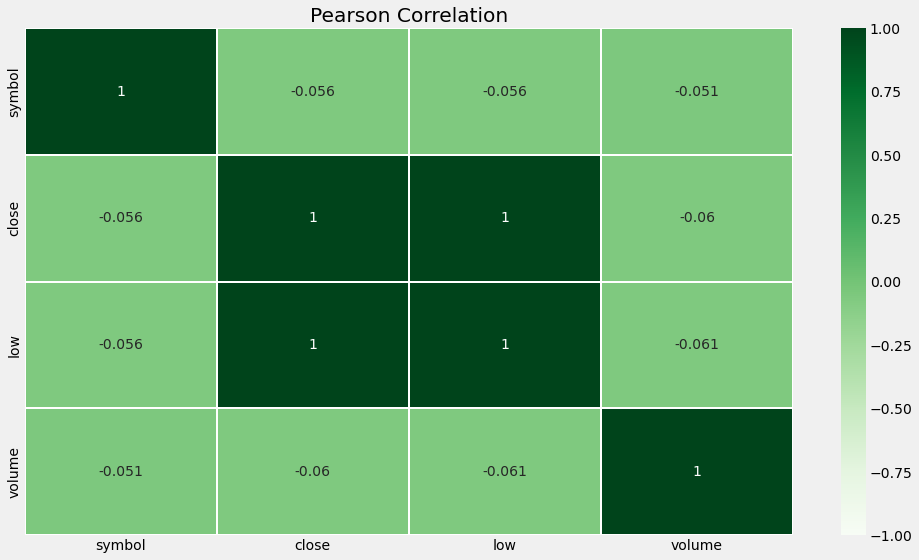

In [309]:
pearsonCorr = data.corr(method='pearson')
spearmanCorr = data.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

In [310]:
# there are two pairs of highly correlated features
# 1. open and close
# 2. low and high

#### -->to simplify the model for the machine, removing one of each pair.
#### -->for simplicity, taking close and high
#### -->removing open and low

In [311]:
prices = prices.drop(['open','high'], axis=1)

In [312]:
prices.columns

Index(['symbol', 'close', 'low', 'volume'], dtype='object')

##  Checking for outliers

In [313]:
# no need to check for outliers in features close,low and high.

In [314]:
#Reason: since they are correlated, their data will also have similar outliers

In [315]:
prices.describe()

,symbol,close,low,volume
count,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,248.800133,70.857109,70.118414,5.415113e+06
std,144.736304,83.689686,82.877294,1.249468e+07
min,0.000000,0.860000,0.830000,0.000000e+00
25%,123.000000,33.849998,33.480000,1.221500e+06
50%,248.000000,52.799999,52.230000,2.476250e+06
75%,374.000000,79.889999,79.110001,5.222500e+06
max,500.000000,1578.130005,1549.939941,8.596434e+08


In [316]:
#OUTLIER CHECK - Clipping
qv1 = prices['close'].quantile(0.25)
qv2 = prices['close'].quantile(0.50)
qv3 = prices['close'].quantile(0.75)
qv_limit = 1.5*(qv3-qv1)

In [317]:
outmask = (prices['close'] > qv3 + qv_limit) | (prices['close'] < qv1 - qv_limit)
outdata = prices['close'][outmask]

Text(0, 0.5, 'close')

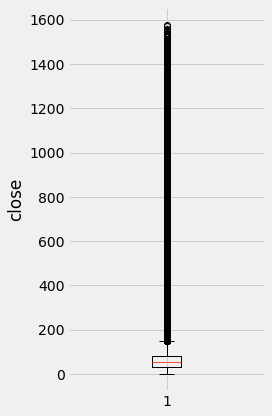

In [318]:
import pylab
fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(prices['close'])
ax.set_ylabel('close')

#### Usually outliers are depicted by the values outside the box. However in the case of stcok prices, we know that each symbol will have varied range of pricing.

### Therefore we will not be considering the data having outliers.

In [319]:
X = prices

In [320]:
y= prices['close']
# since closing price is the one we are interested in predicting

In [321]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [322]:
X_train.shape

(638448, 4)

In [323]:
y_train.shape

(638448,)

In [324]:
from sklearn.ensemble import RandomForestRegressor

In [325]:
rf = RandomForestRegressor()

In [326]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [327]:
y_pred = rf.predict(X_test)

In [328]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_pred)

0.003620147357151711

#### Note: the lower the value the better and 0 means the model is perfect.

In [329]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06016766039286978

#### Note: Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In addition, Adjusted R-squared more than 0.75 is a very good value for showing the accuracy. In some cases, Adjusted R-squared of 0.4 or more is acceptable as well.

In [330]:
r2_score(y_test, y_pred)
# more reliable

0.9999994784027351